<a href="https://colab.research.google.com/github/DanyaFire/StatPrac/blob/main/DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1:** Задержки по дням недели - Перегрузка аэропорта в определенные дни.

Описание: Анализ распределения задержек рейсов по дням недели, для выявления возможных закономерностей, связанных с загруженностью аэропорта.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/datasets/flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1.0,1.0,4.0,AS,98.0,N407AS,ANC,SEA,5.0,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1.0,1.0,4.0,AA,2336.0,N3KUAA,LAX,PBI,10.0,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1.0,1.0,4.0,US,840.0,N171US,SFO,CLT,20.0,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1.0,1.0,4.0,AA,258.0,N3HYAA,LAX,MIA,20.0,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1.0,1.0,4.0,AS,135.0,N527AS,SEA,ANC,25.0,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ar = pd.read_csv('/content/datasets/airlines.csv', low_memory=False)
ar.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
air = pd.read_csv('/content/datasets/airports.csv', low_memory=False)
air.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [8]:
day_delay = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()
day_delay

,DEPARTURE_DELAY
DAY_OF_WEEK,
1.0,13.101384
2.0,10.716843
3.0,9.436942
4.0,10.766662
5.0,10.476925
6.0,8.911637
7.0,10.495083


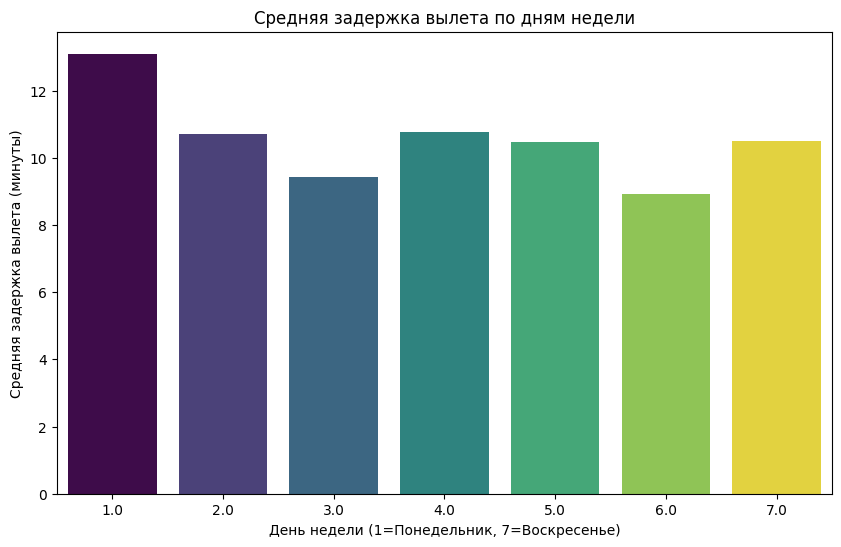

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x = day_delay.index, y = day_delay.values, hue = day_delay.index, palette = "viridis", legend = False)
plt.xlabel("День недели (1=Понедельник, 7=Воскресенье)")
plt.ylabel("Средняя задержка вылета (минуты)")
plt.title("Средняя задержка вылета по дням недели")
plt.show()

Наибольшие задержки наблюдаются в понедельник. Это совпадает с пиком объема рейсов и, возможно, количества пассажиров, что говорит о том, что аэропорты испытывают трудности с обработкой возросшей нагрузки в эти дни.

**Задача 2:** Задержки по авиакомпаниям - Операционная неэффективность определенных перевозчиков.

Описание: Исследование средних задержек по авиакомпаниям, с целью выявить перевозчиков с постоянно более высокими показателями задержек.

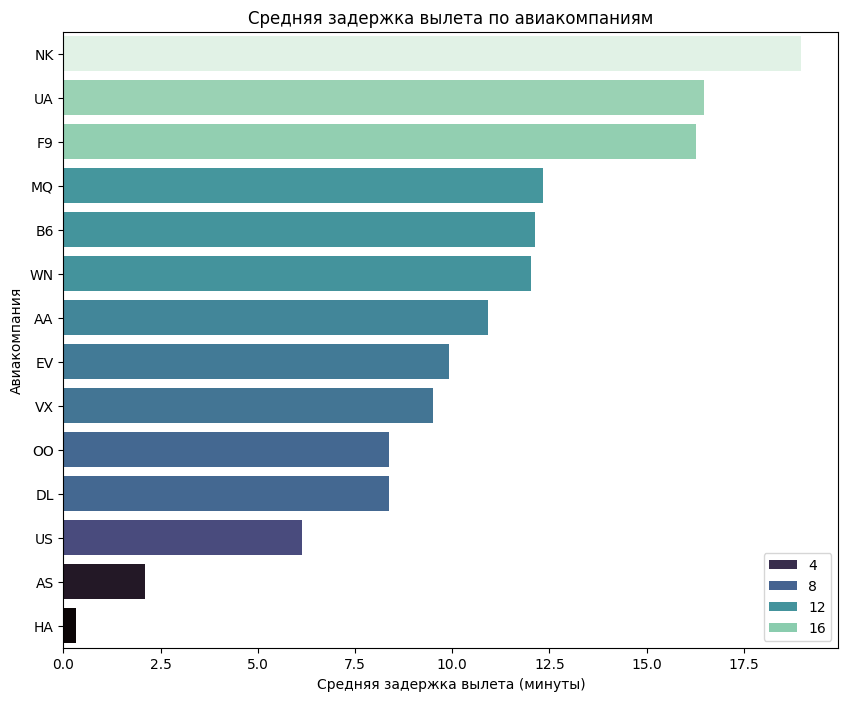

Средняя задержка вылета по авиакомпаниям:
 AIRLINE
NK    18.983917
UA    16.478650
F9    16.276344
MQ    12.335689
B6    12.118159
WN    12.021921
AA    10.908639
EV     9.917392
VX     9.505168
OO     8.386851
DL     8.370559
US     6.141137
AS     2.104293
HA     0.329284
Name: DEPARTURE_DELAY, dtype: float64

Медианная задержка вылета по авиакомпаниям:
 AIRLINE
UA    2.0
NK    0.0
WN    0.0
DL   -1.0
F9   -1.0
VX   -1.0
AA   -2.0
B6   -2.0
MQ   -2.0
US   -2.0
EV   -3.0
OO   -3.0
AS   -4.0
HA   -4.0
Name: DEPARTURE_DELAY, dtype: float64


In [10]:
delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x = delay_by_airline.values, y = delay_by_airline.index, hue = delay_by_airline.values, palette="mako")
plt.xlabel("Средняя задержка вылета (минуты)")
plt.ylabel("Авиакомпания")
plt.title("Средняя задержка вылета по авиакомпаниям")
plt.show()

# Медианную задержку по авиакомпаниям
median_delay_by_airline = df.groupby('AIRLINE')['DEPARTURE_DELAY'].median().sort_values(ascending=False)

print("Средняя задержка вылета по авиакомпаниям:\n", delay_by_airline)
print("\nМедианная задержка вылета по авиакомпаниям:\n", median_delay_by_airline)

Определенные авиакомпании демонстрируют значительно более высокие средние и медианные задержки вылета, чем другие. Большая разница между средней и медианной задержкой для некоторых авиакомпаний предполагает наличие экстремальных задержек-выбросов, которые сильно влияют на среднее значение и требуют дальнейшего изучения.

**Задача 3:** Задержки по аэропортам - Недостатки инфраструктуры и загруженность.

Описание: Анализ задержки вылета на основе аэропорта отправления, чтобы выявить аэропорты с недостатками. Найдём топ 10 самых проблемных аэропортов.

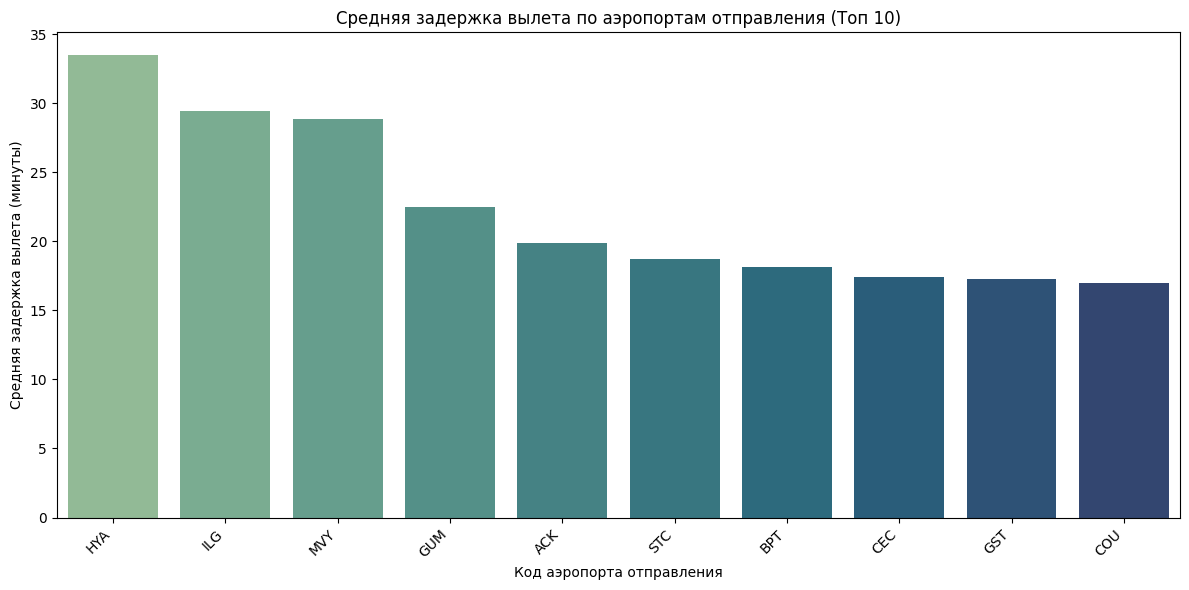

In [12]:
delay_by_origin = df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x = delay_by_origin.index, y = delay_by_origin.values, hue = delay_by_origin.index, palette="crest")
plt.xlabel("Код аэропорта отправления")
plt.ylabel("Средняя задержка вылета (минуты)")
plt.title("Средняя задержка вылета по аэропортам отправления (Топ 10)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

В нескольких аэропортах отправления постоянно наблюдаются значительно более высокие задержки вылета. Это указывает на потенциальные недостатки инфраструктуры или недостаточное количество персонала.

**Задача 4:** Корреляция между временем руления перед взлетом (WHEELS-ON) и задержкой вылета.

Описание: Изучение взаимосвязь между временем руления перед взлетом (временем, затраченным на руление по взлетно-посадочной полосе перед взлетом) и задержкой вылета, чтобы оценить влияние загруженности взлетно-посадочной полосы.

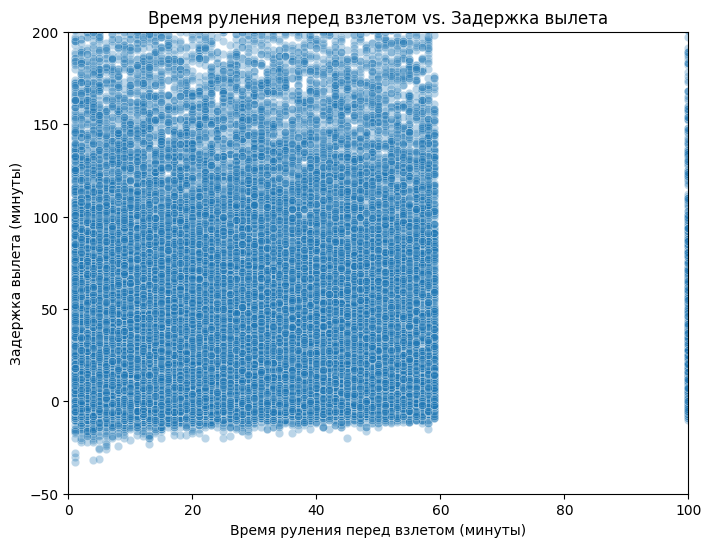

Корреляция между временем руления и задержкой вылета: 0.06


In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WHEELS_ON', y='DEPARTURE_DELAY', data=df, alpha=0.3)
plt.xlabel("Время руления перед взлетом (минуты)")
plt.ylabel("Задержка вылета (минуты)")
plt.title("Время руления перед взлетом vs. Задержка вылета")
plt.xlim(0, 100)
plt.ylim(-50, 200)
plt.show()

correlation = df['WHEELS_ON'].corr(df['DEPARTURE_DELAY'])
print(f"Корреляция между временем руления и задержкой вылета: {correlation:.2f}")

Существует умеренная положительная корреляция между временем руления перед взлетом и задержкой вылета. Более длительное время руления связано с увеличением задержек, вероятно, из-за загруженности взлетно-посадочной полосы и процедур управления воздушным движением. Однако относительно слабая корреляция предполагает, что другие факторы также вносят значительный вклад в задержки.

**Задача 5:** Влияние погоды на задержки рейсов.

Описание: Анализ задержек, связанных с погодными условиями, чтобы оценить эффективность существующих протоколов, связанных с погодой.

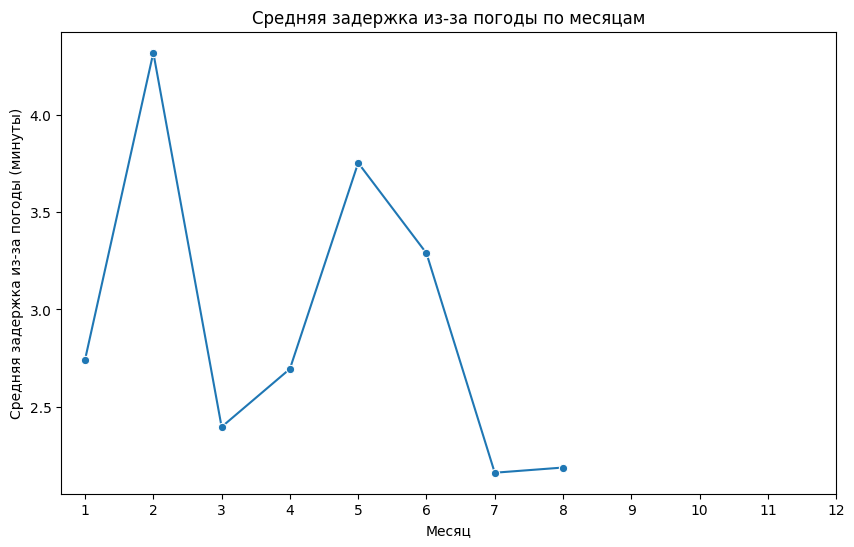

Доля рейсов с задержками, связанными с погодой: 0.01


In [18]:
avg_weather_delay_by_month = df.groupby('MONTH')['WEATHER_DELAY'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_weather_delay_by_month.index, y=avg_weather_delay_by_month.values, marker='o')
plt.xlabel("Месяц")
plt.ylabel("Средняя задержка из-за погоды (минуты)")
plt.title("Средняя задержка из-за погоды по месяцам")
plt.xticks(range(1, 13))
plt.show()

# Рассчитайте долю задержек, связанных с погодой
total_delays = df['DEPARTURE_DELAY'].count()
weather_delays = df[df['WEATHER_DELAY'] > 0]['DEPARTURE_DELAY'].count() #Считайте только те задержки из-за погоды, которые положительны
proportion_weather_delays = weather_delays / total_delays if total_delays else 0
print(f"Доля рейсов с задержками, связанными с погодой: {proportion_weather_delays:.2f}")

Задержки, связанные с погодными условиями, демонстрируют сезонный характер. Может потребоваться дальнейшее изучение эффективности существующих протоколов, связанных с погодой, и инвестиции в технологии для улучшения прогнозирования погоды и принятия решений.